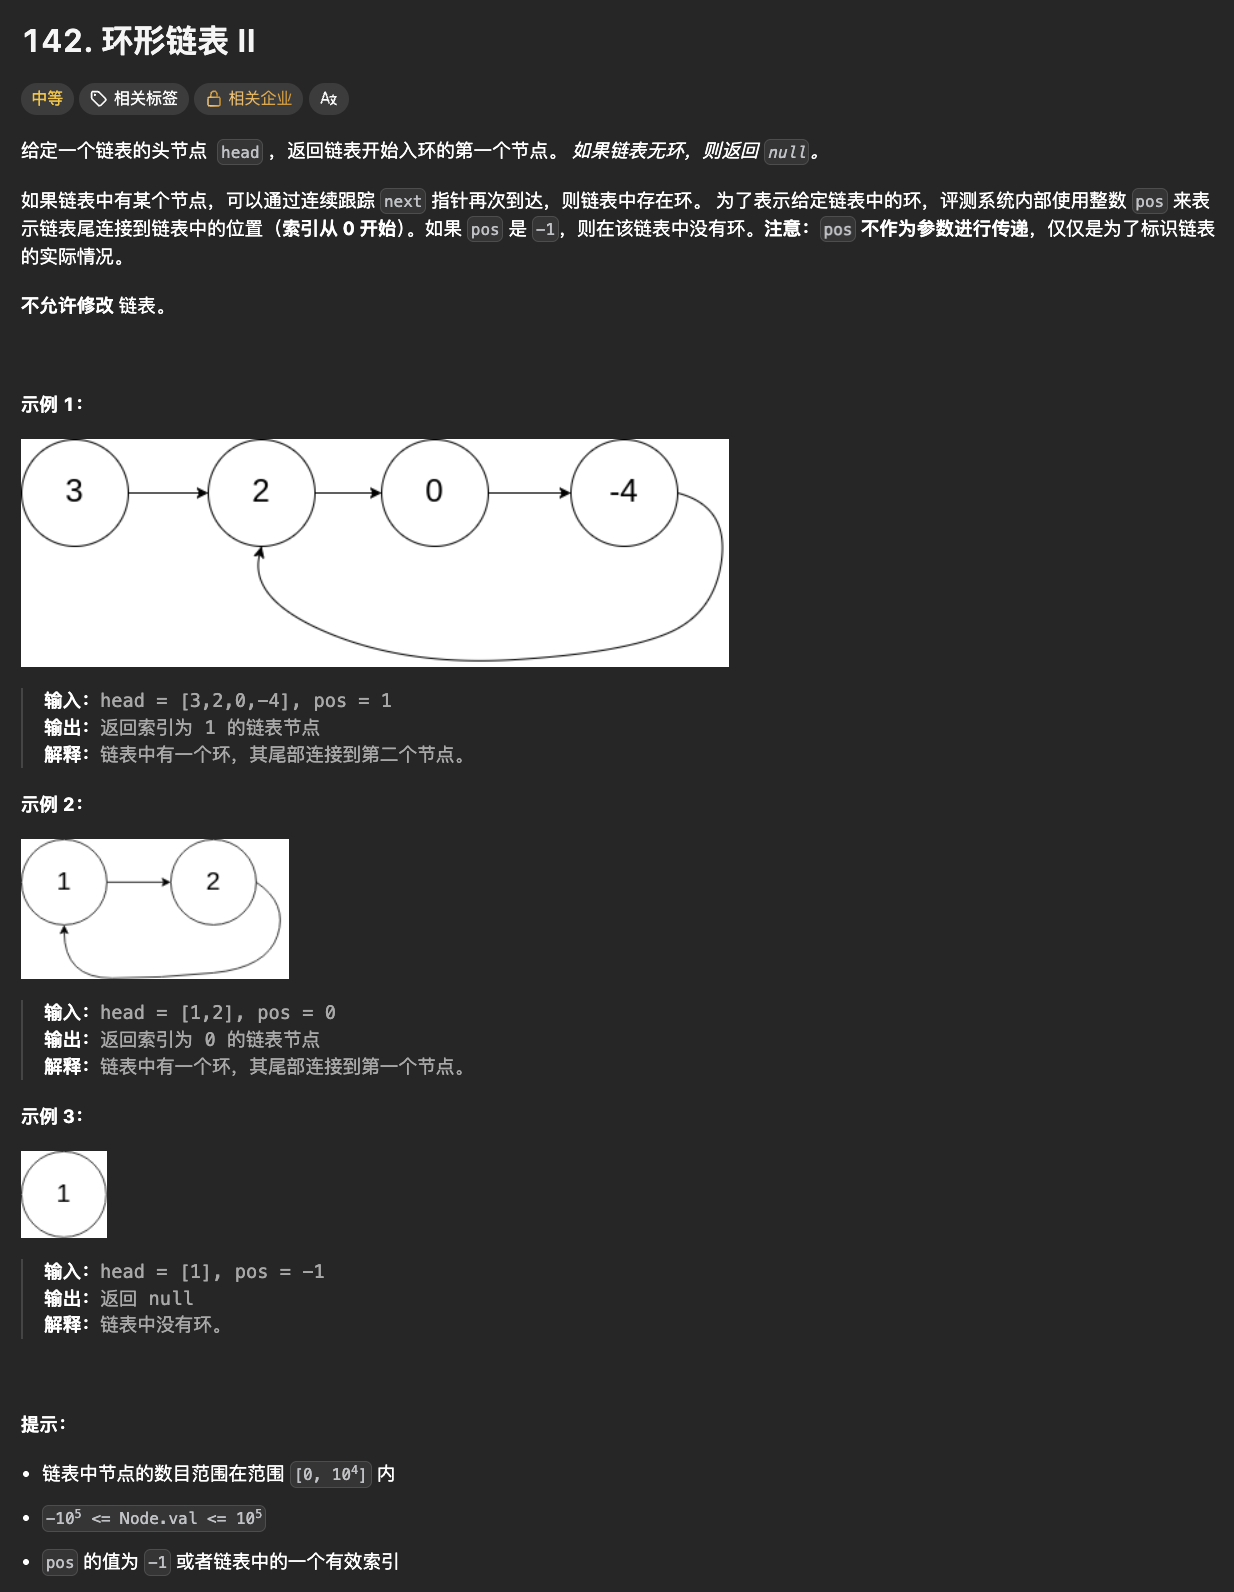

# 环形链表 II - LeetCode 142

## 什么是环形链表?

**环形链表**是指链表中的某个节点的 `next` 指针指向了链表中之前出现过的节点,形成了一个环(循环)。

### 示例:
```
正常链表: 1 -> 2 -> 3 -> 4 -> None

环形链表: 1 -> 2 -> 3 -> 4
               ↑         ↓
               ← ← ← ← ←
(节点4的next指向节点2,形成环)
```

## 题目描述
给定一个链表的头节点 `head`,返回链表开始入环的第一个节点。如果链表无环,则返回 `null`。

**注意:** 不允许修改链表。

## 解题思路

### 核心算法逻辑(快慢指针 + 数学推导):

**第一步:判断是否有环**
- 快指针每次走2步,慢指针每次走1步
- 如果有环,快慢指针一定会在环内相遇
- 如果无环,快指针会先到达 `None`

**第二步:找到入环节点**
- 相遇后,将一个指针移回头节点
- 两个指针每次都走1步
- 再次相遇的位置就是入环节点

**数学原理:**
```
设:头节点到入环点距离为 a
   入环点到相遇点距离为 b
   相遇点到入环点距离为 c
   环的长度为 b + c

快指针路程 = a + b + c + b = a + 2b + c
慢指针路程 = a + b
快指针路程 = 2 × 慢指针路程

因此:a + 2b + c = 2(a + b)
     a + 2b + c = 2a + 2b
     c = a

结论:从头节点到入环点的距离 = 从相遇点到入环点的距离
```

**时间复杂度:** O(n)  
**空间复杂度:** O(1)

## 关键点和易错点

### 关键点:
1. **快慢指针相遇判断有环**:快指针追上慢指针说明有环
2. **数学推导找入环点**:相遇后,头节点和相遇点同时出发,再次相遇就是入环点
3. **指针移动策略**:第一阶段快指针走2步慢指针走1步,第二阶段都走1步

### 易错点:
1. **空链表处理**:head 为 None 要返回 None
2. **无环判断**:快指针到达 None 说明无环
3. **循环条件**:`while fast and fast.next` 防止空指针
4. **第二阶段速度**:两个指针都是每次走1步,不是一快一慢
5. **相遇条件**:用 `==` 判断是否是同一个节点对象,不是比较值

In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def detectCycle(self, head: ListNode) -> ListNode:
        # 边界条件:空链表或只有一个节点
        if not head or not head.next:
            return None
        
        # 第一步:使用快慢指针判断是否有环
        slow = fast = head
        
        # 快指针走2步,慢指针走1步
        while fast and fast.next:
            slow = slow.next          # 慢指针走1步
            fast = fast.next.next     # 快指针走2步
            
            # 如果快慢指针相遇,说明有环
            if slow == fast:
                # 第二步:找到入环节点
                # 将一个指针移回头节点
                ptr1 = head
                ptr2 = slow  # 或者 fast,都一样,因为此时 slow == fast
                
                # 两个指针每次都走1步,相遇点就是入环节点
                while ptr1 != ptr2:
                    ptr1 = ptr1.next  # 从头节点出发,每次走1步
                    ptr2 = ptr2.next  # 从相遇点出发,每次走1步
                
                # 相遇点就是入环节点
                return ptr1
        
        # 快指针到达了末尾,说明无环
        return None


if __name__ == '__main__':
    solution = Solution()
    
    # 测试用例1: 有环,入环节点是第2个节点
    # 3 -> 2 -> 0 -> -4
    #      ↑         ↓
    #      ← ← ← ← ←
    print("测试用例1: [3,2,0,-4], pos=1 (入环节点值为2)")
    node1 = ListNode(3)
    node2 = ListNode(2)
    node3 = ListNode(0)
    node4 = ListNode(-4)
    node1.next = node2
    node2.next = node3
    node3.next = node4
    node4.next = node2  # 形成环,指向node2
    result1 = solution.detectCycle(node1)
    print(f"入环节点值: {result1.val if result1 else None}")  # 2
    print()
    
    # 测试用例2: 有环,入环节点是第1个节点
    # 1 -> 2
    # ↑    ↓
    # ← ← ←
    print("测试用例2: [1,2], pos=0 (入环节点值为1)")
    node5 = ListNode(1)
    node6 = ListNode(2)
    node5.next = node6
    node6.next = node5  # 形成环,指向node5
    result2 = solution.detectCycle(node5)
    print(f"入环节点值: {result2.val if result2 else None}")  # 1
    print()
    
    # 测试用例3: 无环
    # 1 -> 2 -> 3 -> None
    print("测试用例3: [1,2,3], 无环")
    node7 = ListNode(1)
    node8 = ListNode(2)
    node9 = ListNode(3)
    node7.next = node8
    node8.next = node9
    result3 = solution.detectCycle(node7)
    print(f"入环节点值: {result3.val if result3 else None}")  # None
    print()
    
    # 测试用例4: 单节点无环
    # 1 -> None
    print("测试用例4: [1], 无环")
    node10 = ListNode(1)
    result4 = solution.detectCycle(node10)
    print(f"入环节点值: {result4.val if result4 else None}")  # None
    print()
    
    # 测试用例5: 单节点自环
    # 1 -> 1 (自己指向自己)
    print("测试用例5: [1], pos=0 (自环)")
    node11 = ListNode(1)
    node11.next = node11  # 自己指向自己
    result5 = solution.detectCycle(node11)
    print(f"入环节点值: {result5.val if result5 else None}")  # 1

测试用例1: [3,2,0,-4], pos=1 (入环节点值为2)
入环节点值: 2

测试用例2: [1,2], pos=0 (入环节点值为1)
入环节点值: 1

测试用例3: [1,2,3], 无环
入环节点值: None

测试用例4: [1], 无环
入环节点值: None

测试用例5: [1], pos=0 (自环)
入环节点值: 1


In [3]:
#（版本一）快慢指针法
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    def detectCycle(self, head: ListNode) -> ListNode:
        slow = head
        fast = head
        
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            
            # If there is a cycle, the slow and fast pointers will eventually meet
            if slow == fast:
                # Move one of the pointers back to the start of the list
                slow = head
                while slow != fast:
                    slow = slow.next
                    fast = fast.next
                return slow
        # If there is no cycle, return None
        return None

In [4]:
#（版本二）集合法
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution:
    def detectCycle(self, head: ListNode) -> ListNode:
        visited = set()
        
        while head:
            if head in visited:
                return head
            visited.add(head)
            head = head.next
        
        return None